## Analyzing International Students' Mental Health

![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [1]:
-- Run this code to save the CSV file as students
SELECT * 
FROM 'students.csv';

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,222,None,None,None,None,None,None,None,None,None
282,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,249,None,None,None,None,None,None,None,None,None
283,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,203,None,None,None,None,None,None,None,None,None
284,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,247,None,None,None,None,None,None,None,None,None


In [2]:
-- Counting all of the record by student type

SELECT inter_dom AS count_inter_dom, COUNT(*) AS total_records
FROM students
GROUP BY inter_dom;

,count_inter_dom,total_records
0,Inter,201
1,Dom,67
2,None,18


In [3]:
SELECT inter_dom AS count_inter_dom, COUNT(*) AS total_records
FROM students
WHERE academic IS NOT NULL
GROUP BY inter_dom;

,count_inter_dom,total_records
0,Inter,201
1,Dom,67


## Summary Statistics of Diagnostic Tests

In this analysis, we will calculate the summary statistics of the diagnostic tests for all students. We will use aggregate functions to calculate the statistics and round the test scores to two decimal places. Additionally, we will use aliases to provide meaningful names for the calculated statistics.


In [4]:
SELECT

  ROUND(AVG(todep), 2) AS avg_todep,
  ROUND(MIN(todep), 2) AS min_todep,
  ROUND(MAX(todep), 2) AS max_todep,
  ROUND(AVG(tosc), 2) AS avg_tosc,
  ROUND(MIN(tosc), 2) AS min_tosc,
  ROUND(MAX(tosc), 2) AS max_tosc,
  ROUND(AVG(toas), 2) AS avg_toas,
  ROUND(MIN(toas), 2) AS mintoas,
  ROUND(MAX(toas), 2) AS max_toas
FROM students
WHERE inter_dom IS NOT NULL;

,avg_todep,min_todep,max_todep,avg_tosc,min_tosc,max_tosc,avg_toas,mintoas,max_toas
0,8.19,0.0,25.0,37.47,8.0,48.0,72.38,36.0,145.0


In [5]:
SELECT
  ROUND(AVG(todep), 2) AS avg_todep,
  ROUND(MIN(todep), 2) AS min_todep,
  ROUND(MAX(todep), 2) AS max_todep,
  ROUND(AVG(tosc), 2) AS avg_tosc,
  ROUND(MIN(tosc), 2) AS min_tosc,
  ROUND(MAX(tosc), 2) AS max_tosc,
  ROUND(AVG(toas), 2) AS avg_toas,
  ROUND(MIN(toas), 2) AS mintoas,
  ROUND(MAX(toas), 2) AS max_toas
  
FROM students
WHERE inter_dom = 'Inter';


,avg_todep,min_todep,max_todep,avg_tosc,min_tosc,max_tosc,avg_toas,mintoas,max_toas
0,8.04,0.0,25.0,37.42,11.0,48.0,75.56,36.0,145.0


- How does the average depression score (todep) of international students compare to domestic students?
- Are there noticeable differences in social connectedness (tosc) and acculturative stress (toas) scores between international and domestic students?

In [7]:
-- Comparative Analysis
SELECT
  inter_dom,
  AVG(todep) AS avg_todep,
  AVG(tosc) AS avg_tosc,
  AVG(toas) AS avg_toas
FROM students
WHERE inter_dom IS NOT NULL
GROUP BY inter_dom;


,inter_dom,avg_todep,avg_tosc,avg_toas
0,Inter,8.044776,37.417910,75.562189
1,Dom,8.611940,37.641791,62.835821


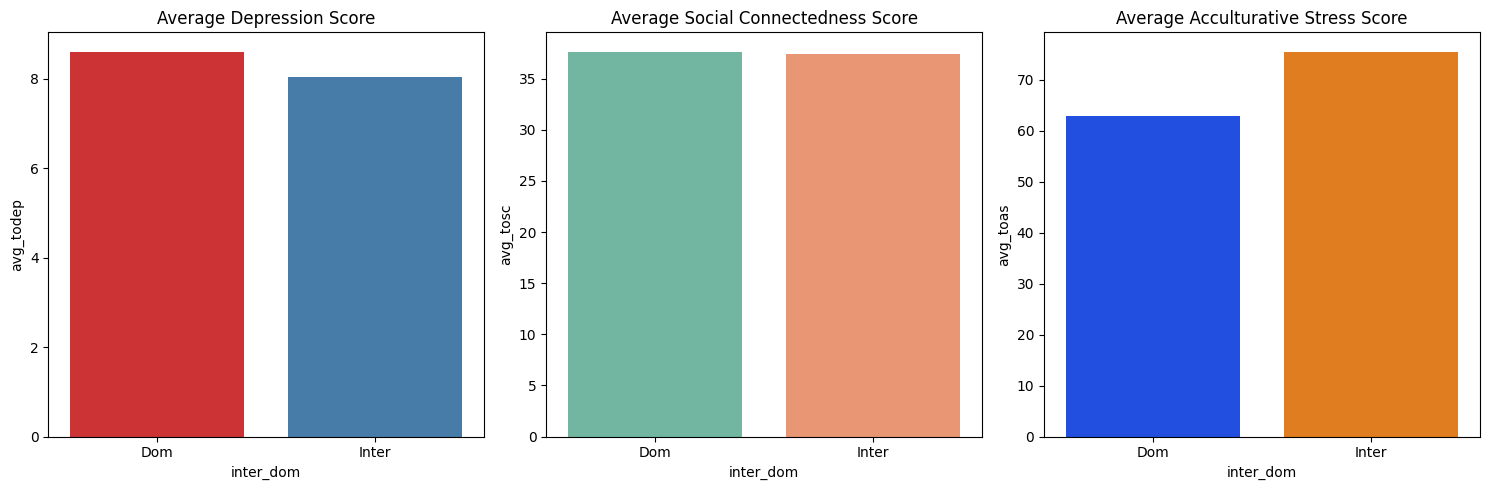

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("students.csv")

comparative_results = df.groupby('inter_dom').agg(
    avg_todep=('todep', 'mean'),
    avg_tosc=('tosc', 'mean'),
    avg_toas=('toas', 'mean')
).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# plot international and domestic students results (different color palettes for practicing)
sns.barplot(x='inter_dom', y='avg_todep', data=comparative_results, ax=axes[0], palette="Set1")
sns.barplot(x='inter_dom', y='avg_tosc', data=comparative_results, ax=axes[1], palette="Set2")
sns.barplot(x='inter_dom', y='avg_toas', data=comparative_results, ax=axes[2], palette="bright")

# plot titles
axes[0].set_title('Average Depression Score')
axes[1].set_title('Average Social Connectedness Score')
axes[2].set_title('Average Acculturative Stress Score')

plt.tight_layout()
plt.show()

### Findings 
#### Acculturative stress refers to the mental and emotional challeges of adopting to a new culture. People might experience when they start to a new school or job. 
- In our findings from analysis on postgre-sql is support the chart which shows average Acculturative Stress is 75.5 for International students and 62.8 for domestic students. 
- This could be a support of the study's findings that international students have a higher risk of mental health difficulties than the general population.

### Language Proficiency Impact:

- Do English and Japanese language proficiency levels correlate with depression scores among international students?
- Are there significant variations in social connectedness and acculturative stress based on language proficiency?

In [9]:
-- Language Proficiency Impact
SELECT
  english_cate,
  japanese_cate,
  AVG(todep) AS avg_todep,
  AVG(tosc) AS avg_tosc,
  AVG(toas) AS avg_toas
FROM students
WHERE inter_dom = 'Inter' AND (english_cate IS NOT NULL OR japanese_cate IS NOT NULL)
GROUP BY english_cate , japanese_cate;


,english_cate,japanese_cate,avg_todep,avg_tosc,avg_toas
0,High,High,6.913043,39.086957,71.869565
1,Average,Low,7.269231,37.769231,78.461538
2,Average,Average,10.153846,36.076923,70.384615
3,High,Average,8.028169,37.802817,76.394366
4,Low,Low,7.666667,40.333333,76.833333
5,High,Low,8.220339,36.305085,75.830508
6,Average,High,13.000000,31.500000,73.500000
7,Low,Average,10.000000,40.000000,74.000000


### Key Findings 
- Students with high level communication in english and japanese has significantly lower level PHQ-9 score (total sccore of depression) among other groups.
- But students who speaks only high level japanese and average level english are shown the lowest score in social connectedness.
- In the Acculturative stress all the groups except who speak high level in japanese, showed us high scores over 76 in average. 

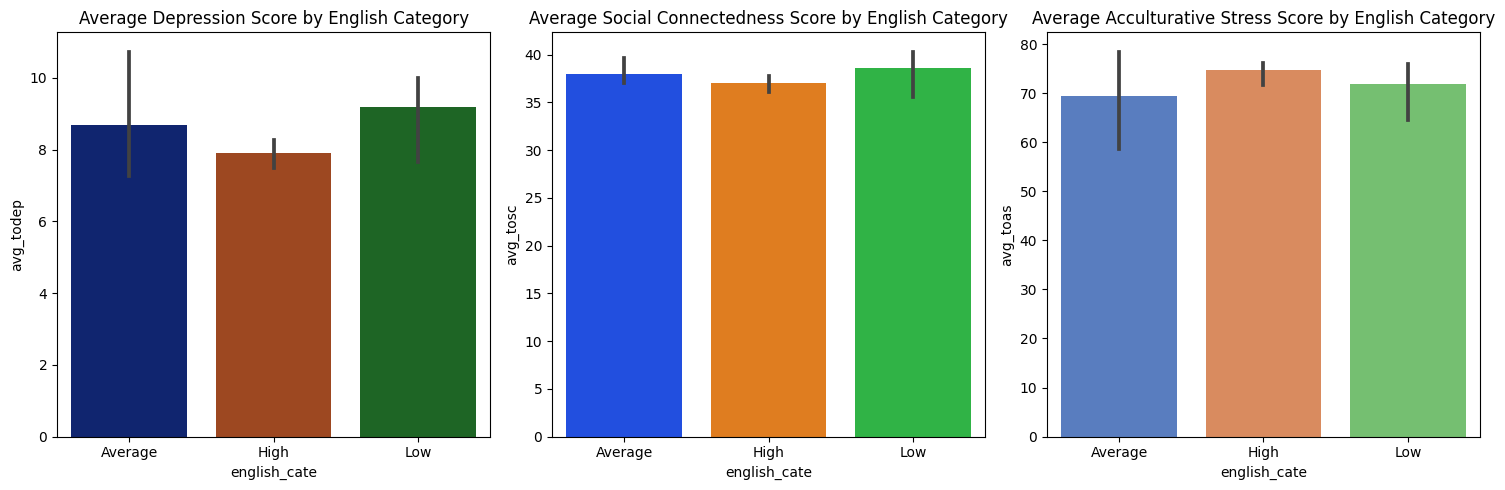

In [10]:
## language profficiency impact 
language_proficiency_results = df.groupby(['english_cate', 'japanese_cate']).agg(
    avg_todep=('todep', 'mean'),
    avg_tosc=('tosc', 'mean'),
    avg_toas=('toas', 'mean')
).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x='english_cate', y='avg_todep', data=language_proficiency_results, ax=axes[0], palette="dark")
sns.barplot(x='english_cate', y='avg_tosc', data=language_proficiency_results, ax=axes[1], palette="bright")
sns.barplot(x='english_cate', y='avg_toas', data=language_proficiency_results, ax=axes[2], palette="muted")

axes[0].set_title('Average Depression Score by English Category')
axes[1].set_title('Average Social Connectedness Score by English Category')
axes[2].set_title('Average Acculturative Stress Score by English Category')

plt.tight_layout()
plt.show()


In [14]:
-- Length of Stay Analysis
SELECT
  stay,
  COUNT(*) AS total_students,
  ROUND(AVG(todep), 2) AS avg_todep,
  ROUND(AVG(tosc), 2) AS avg_tosc,
  ROUND(AVG(toas), 2) AS avg_toas
FROM students
WHERE inter_dom = 'Inter' AND stay IS NOT NULL
GROUP BY stay
ORDER BY stay DESC;


,stay,total_students,avg_todep,avg_tosc,avg_toas
0,10.0,1,13.00,32.00,50.00
1,8.0,1,10.00,44.00,65.00
2,7.0,1,4.00,48.00,45.00
3,6.0,3,6.00,38.00,58.67
4,5.0,3,7.67,34.00,89.00
5,4.0,23,7.96,35.00,78.74
6,3.0,69,8.87,37.78,71.35
7,2.0,52,8.58,37.08,74.87
8,1.0,115,7.70,37.94,71.03


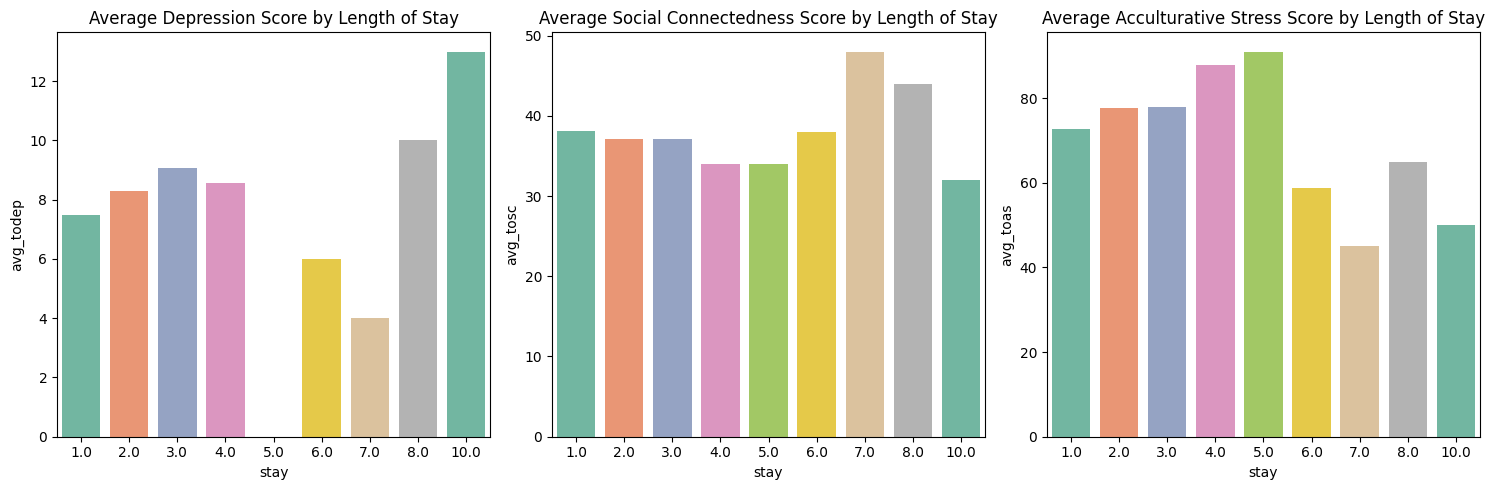

In [25]:

length_of_stay_results = df[df['inter_dom'] == 'Inter'].groupby('stay').agg(
    total_students=('inter_dom', 'count'),
    avg_todep=('todep', 'mean'),
    avg_tosc=('tosc', 'mean'),
    avg_toas=('toas', 'mean')
).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x='stay', y='avg_todep', data=length_of_stay_results, ax=axes[0], palette="Set2")
sns.barplot(x='stay', y='avg_tosc', data=length_of_stay_results, ax=axes[1], palette="Set2")
sns.barplot(x='stay', y='avg_toas', data=length_of_stay_results, ax=axes[2], palette="Set2")

axes[0].set_title('Average Depression Score by Length of Stay')
axes[1].set_title('Average Social Connectedness Score by Length of Stay')
axes[2].set_title('Average Acculturative Stress Score by Length of Stay')

plt.tight_layout()
plt.show()


### Key Findings
- Longer stays seem to have a increasing average depression score.
- There's a trend of decreasing social connectedness scores with longer stays, suggesting potential challenges in maintaining social connections over time.
- Acculturative stress shows a notable increase for a longer stays of 5 years, it tends to decrease initially but it enables us to make objective hypothesis due to limited samples.
#### - These findings provide insights into the potential relationships between the length of stay and mental health factors. Longer stays may present both positive and challenging aspects for international students.

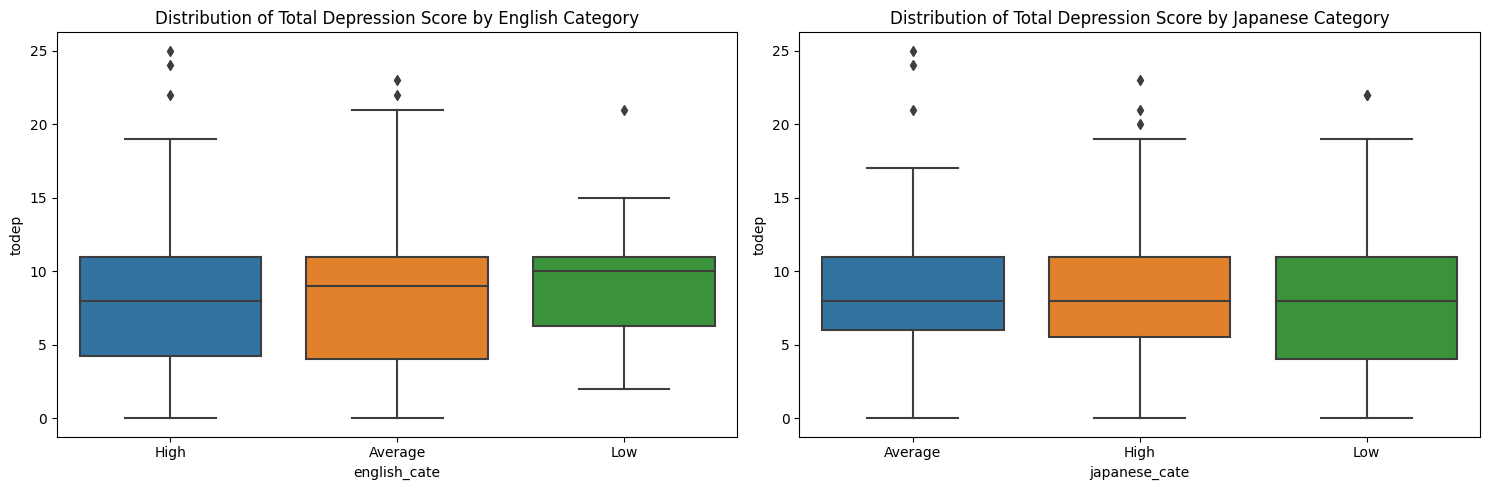

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.boxplot(x='english_cate', y='todep', data=df, ax=axes[0])
sns.boxplot(x='japanese_cate', y='todep', data=df, ax=axes[1])

axes[0].set_title('Distribution of Total Depression Score by English Category')
axes[1].set_title('Distribution of Total Depression Score by Japanese Category')
plt.tight_layout()
plt.show()


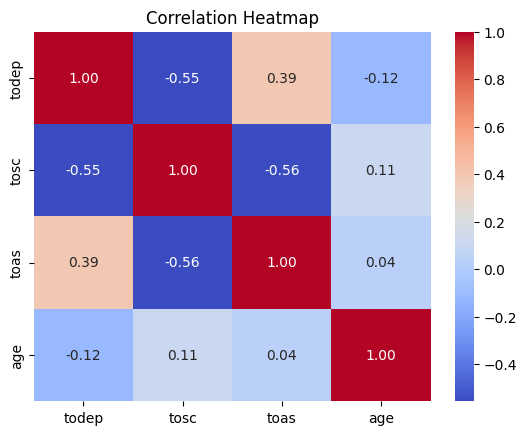

In [22]:
# Heatmap for correlation between stress scores and age

correlation_matrix = df[['todep', 'tosc', 'toas', 'age']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
